# Exploratory Analysis - TACO Benchmark

The [Taco Benchmark](https://huggingface.co/datasets/BAAI/TACO) is coding generation dataset based in comeptitve programming.  
It's possible to see details about the columns and how the dataset work in the link above.  
Here in this notebook we aim to answer the following questions:
- Basic quantities and values
- What is the distribution of questions by difficult in the train and test sets?
- What is the distribution by annotated tag in the train and test sets?
- What is the distribution by skill type in the train and test sets?
- What is the length distribution of input and output?
- Investigate metrics and how to test the dataset


In [1]:
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pyarrow as pa
import pyarrow.feather as feather
from datasets import load_dataset, load_from_disk
from pywaffle import Waffle
import os
import ast

/home/caio.rhoden/miniconda3/envs/datamodels/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
sns.set(style="whitegrid",  # Set the style to whitegrid
        palette="pastel",   # Set the color palette to pastel
        rc={"xtick.color": "black",  # Set x-tick color to black
            "ytick.color": "black",  # Set y-tick color to black
            "xtick.labelsize": 12,   # Set x-tick label size
            "ytick.labelsize": 12}) 

## Load Datasets

In [3]:
# HF_TOKEN = ENTER YOUR TOKEN HERE
PATH = "../../data/TACO"
# train = load_dataset('BAAI/TACO', token=HF_TOKEN, split="train")
# test = load_dataset('BAAI/TACO', token=HF_TOKEN, split="test")
# train.save_to_disk(f"{PATH}/train.hf")
# test.save_to_disk(f"{PATH}/test.hf")

In [4]:
train = load_from_disk(f"{PATH}/train.hf")
test = load_from_disk(f"{PATH}/test.hf")

In [5]:
df_train = pl.DataFrame(train[0:-1])
df_test = pl.DataFrame(test[0:-1])

## Basic Exploration


In [6]:
df_train.columns

['question',
 'solutions',
 'starter_code',
 'input_output',
 'difficulty',
 'raw_tags',
 'name',
 'source',
 'tags',
 'skill_types',
 'url',
 'Expected Auxiliary Space',
 'time_limit',
 'date',
 'picture_num',
 'memory_limit',
 'Expected Time Complexity']

In [7]:
df_train.count()

question,solutions,starter_code,input_output,difficulty,raw_tags,name,source,tags,skill_types,url,Expected Auxiliary Space,time_limit,date,picture_num,memory_limit,Expected Time Complexity
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
25442,25442,25442,25442,25442,25442,3713,25442,25442,25442,20218,2680,11105,6221,7018,11106,2910


In [8]:
df_test.count()

question,solutions,starter_code,input_output,difficulty,raw_tags,name,source,tags,skill_types,url,Expected Auxiliary Space,time_limit,date,picture_num,memory_limit,Expected Time Complexity
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
999,999,999,999,999,999,45,999,999,999,999,0,617,667,477,617,14


## What is the distribution of questions by difficult in the train and test sets?

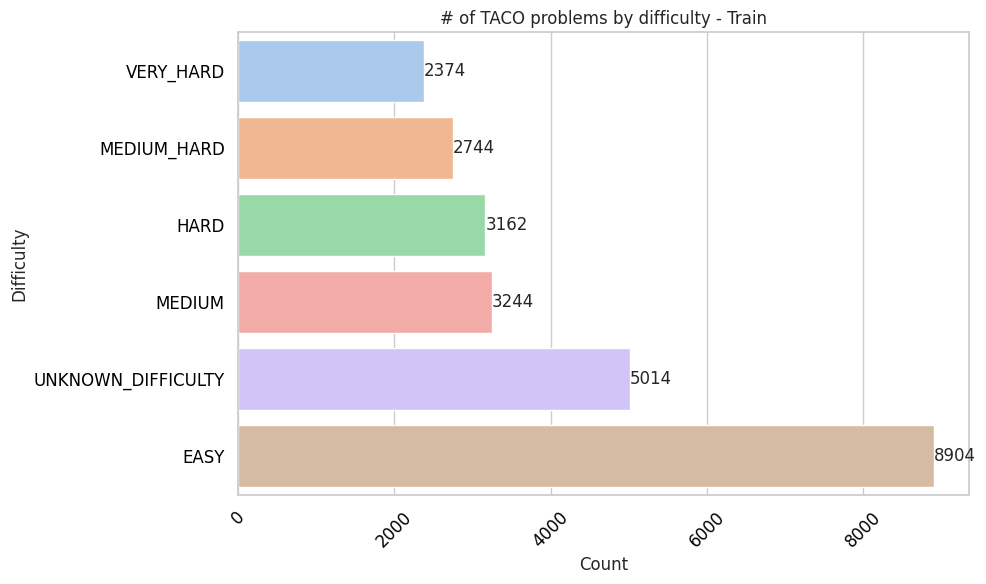

In [9]:
_view = df_train.group_by("difficulty").len().sort("len")

plt.figure(figsize=(10, 6))
sns.barplot(x="len", y="difficulty", data=_view, orient="h", palette="pastel", hue="difficulty", legend=False)

# Rotate x-axis labels diagonally
plt.xticks(rotation=45)

# Add bar values as text
for index, value in enumerate(_view["len"]):
    plt.text(value, index, f"{value}", va="center")

# Add labels and title
plt.xlabel("Count")
plt.ylabel("Difficulty")
plt.title("# of TACO problems by difficulty - Train")

# Show plot
plt.tight_layout()
plt.show()

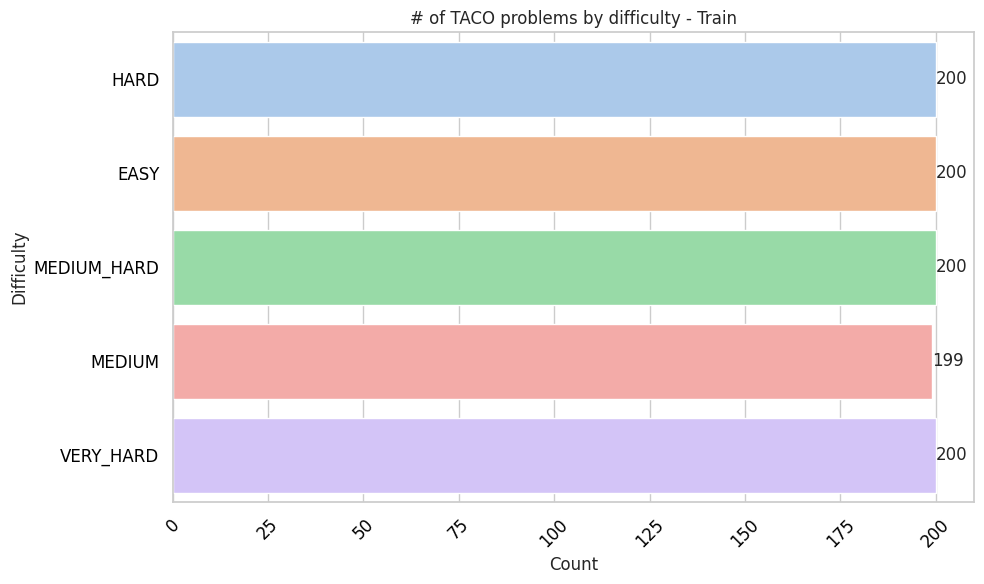

In [10]:
_view = df_test.group_by("difficulty").len()
plt.figure(figsize=(10, 6))
sns.barplot(x="len", y="difficulty", data=_view, orient="h", palette="pastel", hue="difficulty", legend=False)

# Rotate x-axis labels diagonally
plt.xticks(rotation=45)

# Add bar values as text
for index, value in enumerate(_view["len"]):
    plt.text(value, index, f"{value}", va="center")

# Add labels and title
plt.xlabel("Count")
plt.ylabel("Difficulty")
plt.title("# of TACO problems by difficulty - Train")

# Show plot
plt.tight_layout()
plt.show()

## What is the distribution by annotated tag in the train and test sets?

In [11]:
_view = (
    df_train
    .with_columns(pl.col("tags").map_elements(lambda x: ast.literal_eval(x)).alias("tags"))
    .explode("tags")
    .group_by("tags")
    .len()
    .sort("len")
)
_view.count()

/tmp/ipykernel_1223985/1067661092.py:3: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
  .with_columns(pl.col("tags").map_elements(lambda x: ast.literal_eval(x)).alias("tags"))


tags,len
u32,u32
36,37


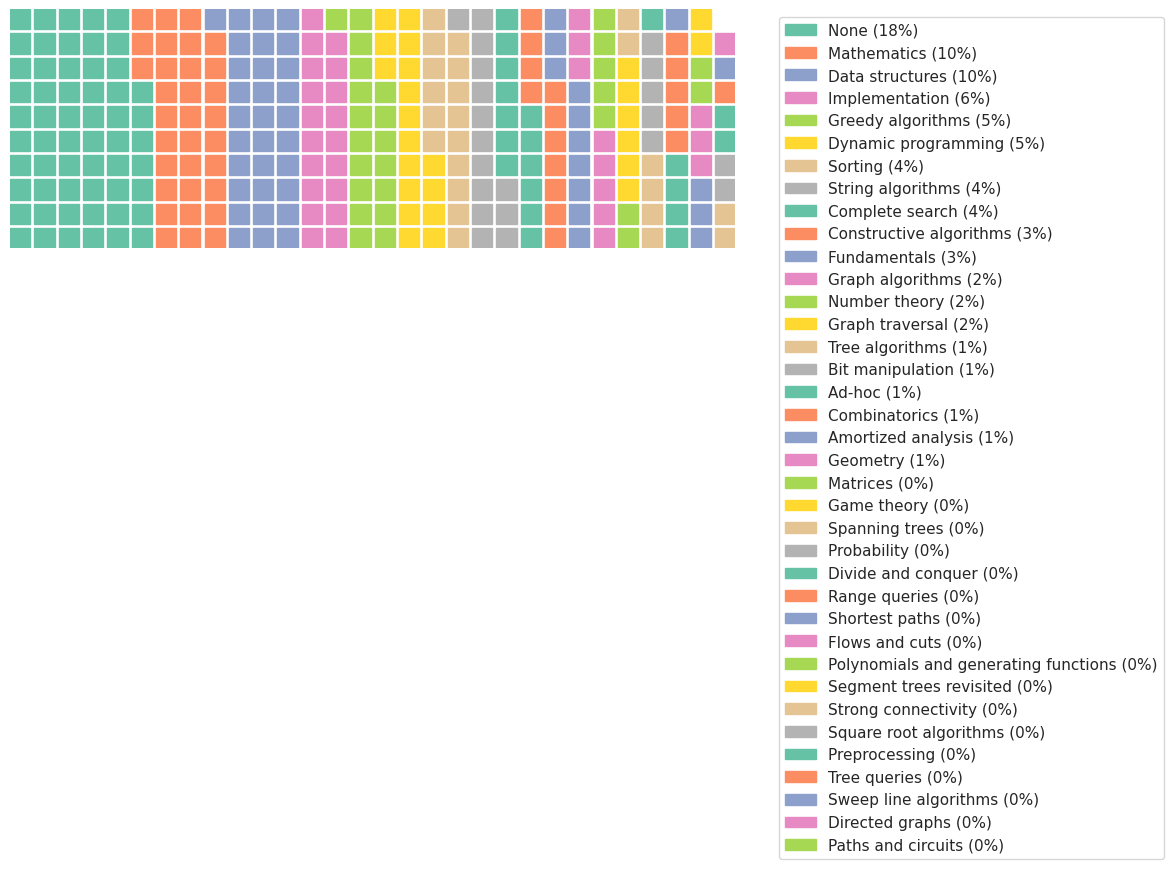

In [12]:
data = {}
tags = _view.sort("len", descending=True).to_dicts()


for tag in tags:
    data[tag["tags"]] = tag["len"]

repartition = [f"{k} ({int(v / sum(data.values()) * 100)}%)" for k, v in data.items()]

plt.figure(
    figsize=(12, 12),
    FigureClass=Waffle,
    rows=10,
    columns=30,
    values=data,
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.05, 1)},
    labels=repartition,
)
plt.show()

In [13]:
_view[20:-1]

tags,len
str,u32
"""Ad-hoc""",763
"""Bit manipulation""",816
"""Tree algorithms""",872
"""Graph traversal""",931
"""Number theory""",1097
…,…
"""Dynamic programming""",2584
"""Greedy algorithms""",2649
"""Implementation""",2799


In [14]:
_view = (
    df_test
    .with_columns(pl.col("tags").map_elements(lambda x: ast.literal_eval(x)).alias("tags"))
    .explode("tags")
    .group_by("tags")
    .len()
    .sort("len")
)
_view.count()

/tmp/ipykernel_1223985/4074556868.py:3: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
  .with_columns(pl.col("tags").map_elements(lambda x: ast.literal_eval(x)).alias("tags"))


tags,len
u32,u32
36,36


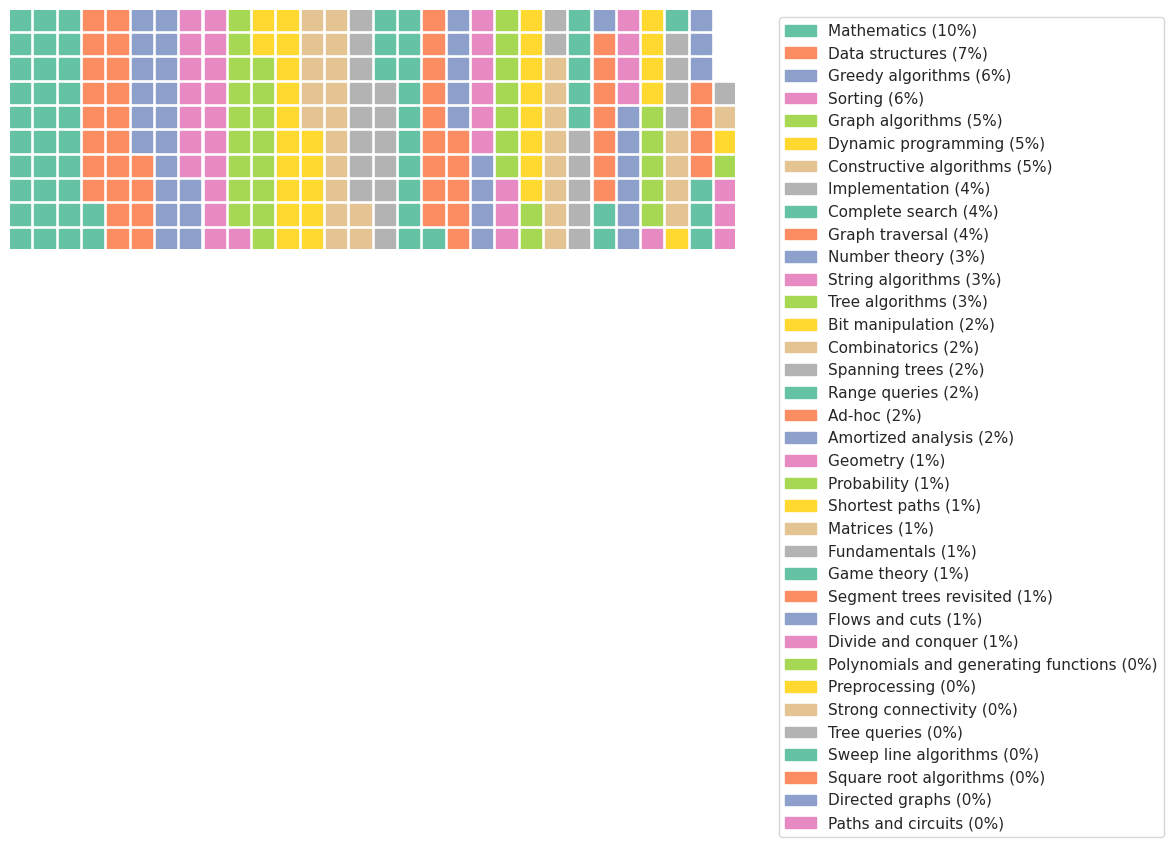

In [15]:
data = {}
tags = _view.sort("len", descending=True).to_dicts()


for tag in tags:
    data[tag["tags"]] = tag["len"]

repartition = [f"{k} ({int(v / sum(data.values()) * 100)}%)" for k, v in data.items()]

plt.figure(
    figsize=(12, 12),
    FigureClass=Waffle,
    rows=10,
    columns=30,
    values=data,
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.05, 1)},
    labels=repartition,
)
plt.show()

## What is the distribution by skill type in the train and test sets?

In [16]:
_view = (
    df_train
    .with_columns(pl.col("skill_types").map_elements(lambda x: ast.literal_eval(x)).alias("skills"))
    .explode("skills")
    .group_by("skills")
    .len()
    .sort("len")
)
_view.count()

/tmp/ipykernel_1223985/292461543.py:3: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
  .with_columns(pl.col("skill_types").map_elements(lambda x: ast.literal_eval(x)).alias("skills"))


skills,len
u32,u32
8,9


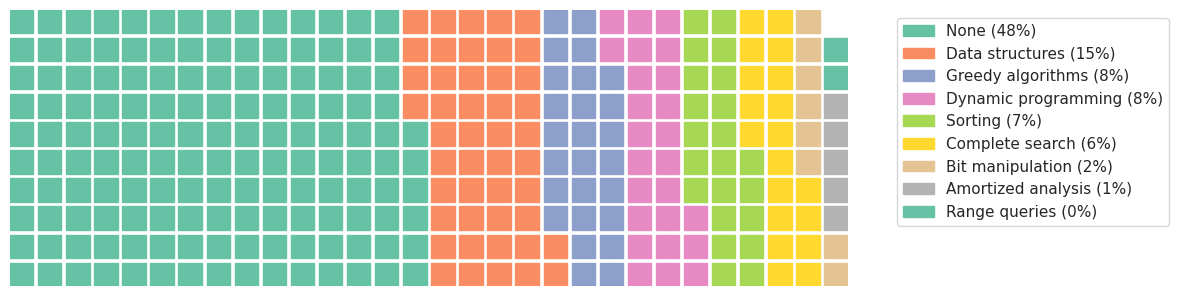

In [17]:
data = {}
tags = _view.sort("len", descending=True).to_dicts()


for tag in tags:
    data[tag["skills"]] = tag["len"]

repartition = [f"{k} ({int(v / sum(data.values()) * 100)}%)" for k, v in data.items()]

plt.figure(
    figsize=(12, 12),
    FigureClass=Waffle,
    rows=10,
    columns=30,
    values=data,
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.05, 1)},
    labels=repartition,
)
plt.show()

In [18]:
_view = (
    df_test
    .with_columns(pl.col("skill_types").map_elements(lambda x: ast.literal_eval(x)).alias("skills"))
    .explode("skills")
    .group_by("skills")
    .len()
    .sort("len")
)
_view.count()

/tmp/ipykernel_1223985/2221793360.py:3: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
  .with_columns(pl.col("skill_types").map_elements(lambda x: ast.literal_eval(x)).alias("skills"))


skills,len
u32,u32
8,9


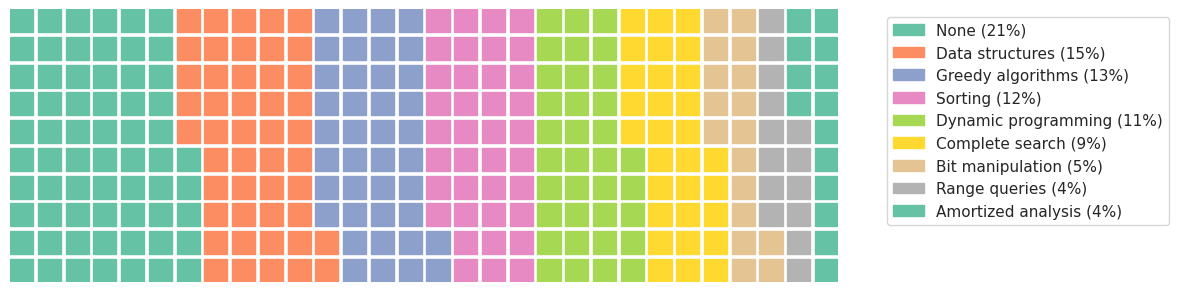

In [19]:
data = {}
tags = _view.sort("len", descending=True).to_dicts()


for tag in tags:
    data[tag["skills"]] = tag["len"]

repartition = [f"{k} ({int(v / sum(data.values()) * 100)}%)" for k, v in data.items()]

plt.figure(
    figsize=(12, 12),
    FigureClass=Waffle,
    rows=10,
    columns=30,
    values=data,
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.05, 1)},
    labels=repartition,
)
plt.show()

## What is the length distribution of input and output?

In [20]:
df_train

question,solutions,starter_code,input_output,difficulty,raw_tags,name,source,tags,skill_types,url,Expected Auxiliary Space,time_limit,date,picture_num,memory_limit,Expected Time Complexity
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""This is an interactive problem…","""[]""","""""","""{""inputs"": [""hack\n30\n1 0 1 1…","""HARD""","""['interactive', 'binary search…",null,"""codeforces""","""['Geometry', 'Sorting', 'Const…","""['Sorting']""","""https://codeforces.com/problem…",null,"""2.0 seconds""",null,null,"""256.0 megabytes""",null
"""There are $n$ candy boxes in f…","""[""INF = 10000000000.0\nmax_n =…","""""","""{""inputs"": [""5 3 10\n1 2 3 4 5…","""HARD""","""['dp']""",null,"""codeforces""","""['Dynamic programming']""","""['Dynamic programming']""","""https://codeforces.com/problem…",null,null,"""2019-12-31""",null,null,null
"""Little Petya likes to play a l…","""[]""","""""","""{""inputs"": [""10 10\n5 1 2 4 1 …","""VERY_HARD""","""['data structures', 'dsu']""",null,"""codeforces""","""['Spanning trees', 'Data struc…","""['Data structures']""","""https://codeforces.com/problem…",null,"""1.0 seconds""",null,null,"""64.0 megabytes""",null
"""If you visit Aizu Akabeko shri…","""[""def sub(maxs, mins):\n\tfor …","""""","""{""inputs"": [""9714431"", ""166123…","""UNKNOWN_DIFFICULTY""","""[]""",null,"""aizu""","""[]""","""[]""",null,null,"""1.0 seconds""",null,null,"""268.435456 megabytes""",null
"""You have a deck of $n$ cards, …","""[""import heapq\nfrom math impo…","""""","""{""inputs"": [""4\n4\n1 2 3 4\n5\…","""EASY""","""['data structures', 'greedy', …",null,"""codeforces""","""['Data structures', 'Mathemati…","""['Data structures', 'Greedy al…","""https://codeforces.com/problem…",null,"""1 second""","""2021-02-23""","""0""","""512 megabytes""",null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Given an integer, $n$, print t…","""[""N = int(input())\nwidth = le…","""""","""{""inputs"": [""17\n""], ""outputs""…","""EASY""","""['Python - Strings']""",null,"""hackerrank""","""['String algorithms']""","""[]""","""https://www.hackerrank.com/cha…",null,null,null,"""0""",null,null
"""The manager of the Japanese sw…","""[]""","""""","""{""inputs"": [""5\n4 9 1 3 8\n10\…","""UNKNOWN_DIFFICULTY""","""[]""",null,"""aizu""","""[]""","""[]""",null,null,"""8.0 seconds""",null,null,"""134.217728 megabytes""",null
"""Your game development studio, …","""[]""","""""","""{""inputs"": [""20 30\n2 10 20 2 …","""HARD""","""[]""",null,"""kattis""","""[]""","""[]""","""https://open.kattis.com/proble…",null,null,null,null,null,null


<Axes: xlabel='len', ylabel='Count'>

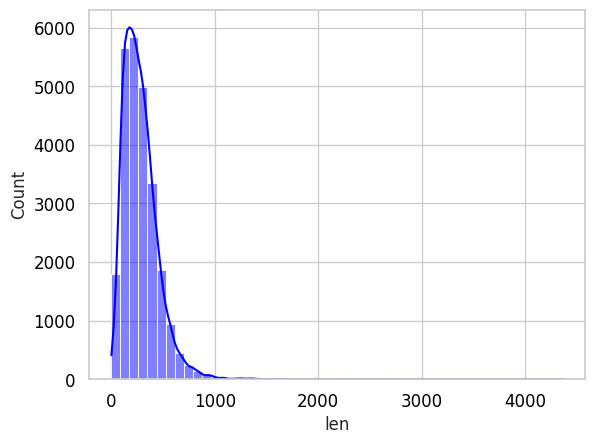

In [21]:
_view = (
    df_train
    .select(["question"])
    .with_columns(
        pl.col("question").pipe(lambda x: x.str.split(" ").list.len()).alias("len"),
    )

)

sns.histplot(data=_view, x="len", kde=True, bins=50, color="blue")

<Axes: xlabel='len', ylabel='Count'>

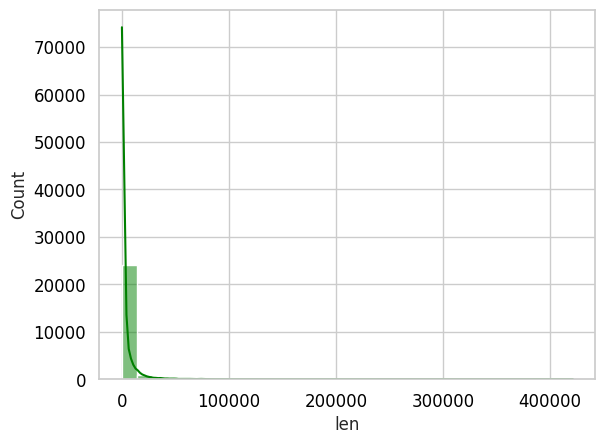

In [22]:
_view = (
    df_train
    .select(["solutions"])
    .with_columns(
        pl.col("solutions").pipe(lambda x: x.str.split(" ").list.len()).alias("len"),
    )

)

sns.histplot(data=_view, x="len", kde=True, bins=30, color="green")

In [23]:
df_train

question,solutions,starter_code,input_output,difficulty,raw_tags,name,source,tags,skill_types,url,Expected Auxiliary Space,time_limit,date,picture_num,memory_limit,Expected Time Complexity
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""This is an interactive problem…","""[]""","""""","""{""inputs"": [""hack\n30\n1 0 1 1…","""HARD""","""['interactive', 'binary search…",null,"""codeforces""","""['Geometry', 'Sorting', 'Const…","""['Sorting']""","""https://codeforces.com/problem…",null,"""2.0 seconds""",null,null,"""256.0 megabytes""",null
"""There are $n$ candy boxes in f…","""[""INF = 10000000000.0\nmax_n =…","""""","""{""inputs"": [""5 3 10\n1 2 3 4 5…","""HARD""","""['dp']""",null,"""codeforces""","""['Dynamic programming']""","""['Dynamic programming']""","""https://codeforces.com/problem…",null,null,"""2019-12-31""",null,null,null
"""Little Petya likes to play a l…","""[]""","""""","""{""inputs"": [""10 10\n5 1 2 4 1 …","""VERY_HARD""","""['data structures', 'dsu']""",null,"""codeforces""","""['Spanning trees', 'Data struc…","""['Data structures']""","""https://codeforces.com/problem…",null,"""1.0 seconds""",null,null,"""64.0 megabytes""",null
"""If you visit Aizu Akabeko shri…","""[""def sub(maxs, mins):\n\tfor …","""""","""{""inputs"": [""9714431"", ""166123…","""UNKNOWN_DIFFICULTY""","""[]""",null,"""aizu""","""[]""","""[]""",null,null,"""1.0 seconds""",null,null,"""268.435456 megabytes""",null
"""You have a deck of $n$ cards, …","""[""import heapq\nfrom math impo…","""""","""{""inputs"": [""4\n4\n1 2 3 4\n5\…","""EASY""","""['data structures', 'greedy', …",null,"""codeforces""","""['Data structures', 'Mathemati…","""['Data structures', 'Greedy al…","""https://codeforces.com/problem…",null,"""1 second""","""2021-02-23""","""0""","""512 megabytes""",null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Given an integer, $n$, print t…","""[""N = int(input())\nwidth = le…","""""","""{""inputs"": [""17\n""], ""outputs""…","""EASY""","""['Python - Strings']""",null,"""hackerrank""","""['String algorithms']""","""[]""","""https://www.hackerrank.com/cha…",null,null,null,"""0""",null,null
"""The manager of the Japanese sw…","""[]""","""""","""{""inputs"": [""5\n4 9 1 3 8\n10\…","""UNKNOWN_DIFFICULTY""","""[]""",null,"""aizu""","""[]""","""[]""",null,null,"""8.0 seconds""",null,null,"""134.217728 megabytes""",null
"""Your game development studio, …","""[]""","""""","""{""inputs"": [""20 30\n2 10 20 2 …","""HARD""","""[]""",null,"""kattis""","""[]""","""[]""","""https://open.kattis.com/proble…",null,null,null,null,null,null


In [24]:
import json
import sys
count = 0
sys.set_int_max_str_digits(10000)

for i in range(len(df_train)):
    try:
        conv = json.loads(train[i]["input_output"])
    except:
        conv = None
        count  += 1

count

1